# **빅데이터 개론 Lab 14 - Support Vector Machine(SVM)**

참고자료 : https://www.notion.so/TA-2689a38b5289413a82671d3956fea103

- - -




### **Support Vector Machine(SVM)**

* 분류와 회귀를 수행 가능하며, 딥러닝이 나온 이후에도 여전히 활발히 사용되고 있는 머신 러닝 알고리즘이다. 
* 분류를 위한 결정 경계 (Decision Boundary) 를  정의하는 모델이다.
* 직관적으로 자료를 클래스별로 가장 잘 분리하는 결정 경계는 가장 가까운 훈련용 자료까지의 거리(이를 마진(margin)이라 함)가 가장 큰 경우이며, 마진이 가장 큰 결정 경계를 분류기(classifier)로 사용할 때, 새로운 자료에 대한 오류율이 가장 낮아진다.
즉, 최대 마진을 가지는 선형분류별에 기초하며, 속성들 간의 의존성은 고려하지 않는 방법이다.
* 서포트 벡터들은 두 클래스 사이의 경계에 위치한 데이터 포인트들을 말한다. 이 데이터들이 결정경계를 지지(support)하고 있다고 말할 수 있으므로 서포트 벡터라고 부른다. 

<br>

<p align="center"><img src="https://github.com/Jin0331/TA/blob/master/image/svm1.png?raw=true" width="425"/> </p>

<br>

* 선형분류 뿐 아니라, 커널 트릭(kernel trick)이라 불리는 다차원 공간상으로의 맵핑(mapping) 기법을 사용하여 비선형분류도 효율적으로 수행한다.

<br>

<p align="center"><img src="https://github.com/Jin0331/TA/blob/master/image/svm2.png?raw=true" width="425"/> <img src="https://github.com/Jin0331/TA/blob/master/image/svm3.png?raw=true" width="425"/> </p>


* 커널 트릭 (Kernel Trick)

<br>

<p align="center"><img src="https://github.com/Jin0331/TA/blob/master/image/k_1.png?raw=true" width="300"/> <img src="https://github.com/Jin0331/TA/blob/master/image/k_2.png?raw=true" width="425"/> </p>

<br>

* SVM을 수행하는 R 패키지에는 {e1071}, {kernlab}, {klaR}, {svmpath}, {shogun} 등이 있다.
이 가운데 {e1071} 패키지가 R에서 가장 먼저 소개되었으며 가장 직관적

### **SVM 예시**


In [11]:
install.packages(c("tidyverse", "caret", "e1071"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



- - -

#### **A. Heart Disease**

* https://archive.ics.uci.edu/ml/datasets/heart+disease

* 변수 설명

```
Age : age in years
Sex: sex (1 = male; 0 = female) # Factor
ChestPain : (typical angina, atypical angina, non-anginal pain, asymptomatic # Factor
RestBP(혈압) : resting blood pressure
Chol(콜레스테롤 수치) : serum cholestoral in mg/dl
Fbs(혈당) : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) # Factor
Restecg(심전도) : (0 = normal, 1 = having ST-T wave abnormality, 2 =  showing probable or definite left ventricular hypertrophy by Estes' criteria) # Factor
MaxHR : maximum heart rate achieved
ExAng(협심증?): exercise induced angina (1 = yes; 0 = no) # Factor
Oldpeak = ST depression induced by exercise relative to rest
Slope: the slope of the peak exercise ST segment(1 = upsloping, 2 = flat, 3 = downsloping) # Factor
Ca: number of major vessels (0-3) colored by flourosopy # Factor
Thal: 3 = normal; 6 = fixed defect; 7 = reversable defect # Factor

# the predicted attribute(반응변수)

AHD : diagnosis of heart disease (angiographic disease status)(0 = < 50% diameter narrowing, 1 =  > 50% diameter narrowing)

# http://archive.ics.uci.edu/ml/datasets/heart+Disease
```

In [2]:
library(tidyverse)
heart_df <- read_csv("https://raw.githubusercontent.com/Jin0331/TA/master/data/heart/Heart.csv") 
str(heart_df)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  Age = col_double(),
  Sex = col_double(),
  ChestPain = col_character(),
  RestBP = col_double(),
  Chol = col_double(),
  Fbs = col_double(),
  RestECG = col_double(),
  MaxHR = col_double(),
  ExAng = col_double(),
  Oldpeak = col_double(),
  Slope = col_double(),
  Ca = col_double(),
  Thal = col_character(),
  AHD = col_character()
)




tibble [303 × 15] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ X1       : num [1:303] 1 2 3 4 5 6 7 8 9 10 ...
 $ Age      : num [1:303] 63 67 67 37 41 56 62 57 63 53 ...
 $ Sex      : num [1:303] 1 1 1 1 0 1 0 0 1 1 ...
 $ ChestPain: chr [1:303] "typical" "asymptomatic" "asymptomatic" "nonanginal" ...
 $ RestBP   : num [1:303] 145 160 120 130 130 120 140 120 130 140 ...
 $ Chol     : num [1:303] 233 286 229 250 204 236 268 354 254 203 ...
 $ Fbs      : num [1:303] 1 0 0 0 0 0 0 0 0 1 ...
 $ RestECG  : num [1:303] 2 2 2 0 2 0 2 0 2 2 ...
 $ MaxHR    : num [1:303] 150 108 129 187 172 178 160 163 147 155 ...
 $ ExAng    : num [1:303] 0 1 1 0 0 0 0 1 0 1 ...
 $ Oldpeak  : num [1:303] 2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 1.4 3.1 ...
 $ Slope    : num [1:303] 3 2 2 3 1 1 3 1 2 3 ...
 $ Ca       : num [1:303] 0 3 2 0 0 0 2 0 1 0 ...
 $ Thal     : chr [1:303] "fixed" "normal" "reversable" "normal" ...
 $ AHD      : chr [1:303] "No" "Yes" "Yes" "No" ...
 - attr(*, "spec")=
  .. cols(
  ..   X1 = col_

* mutate를 이용한 데이터 타입 변경(int or chr ---> factor)

In [3]:
# Facter형으로 변경해줌 

heart_df <- heart_df %>% 
 mutate_at(`.vars` = c("Sex", "ChestPain", "Fbs", "RestECG", "ExAng", "Slope", "Ca", "Thal", "AHD"), `.funs` = as.factor)
heart_df %>% str()

tibble [303 × 15] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ X1       : num [1:303] 1 2 3 4 5 6 7 8 9 10 ...
 $ Age      : num [1:303] 63 67 67 37 41 56 62 57 63 53 ...
 $ Sex      : Factor w/ 2 levels "0","1": 2 2 2 2 1 2 1 1 2 2 ...
 $ ChestPain: Factor w/ 4 levels "asymptomatic",..: 4 1 1 2 3 3 1 1 1 1 ...
 $ RestBP   : num [1:303] 145 160 120 130 130 120 140 120 130 140 ...
 $ Chol     : num [1:303] 233 286 229 250 204 236 268 354 254 203 ...
 $ Fbs      : Factor w/ 2 levels "0","1": 2 1 1 1 1 1 1 1 1 2 ...
 $ RestECG  : Factor w/ 3 levels "0","1","2": 3 3 3 1 3 1 3 1 3 3 ...
 $ MaxHR    : num [1:303] 150 108 129 187 172 178 160 163 147 155 ...
 $ ExAng    : Factor w/ 2 levels "0","1": 1 2 2 1 1 1 1 2 1 2 ...
 $ Oldpeak  : num [1:303] 2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 1.4 3.1 ...
 $ Slope    : Factor w/ 3 levels "1","2","3": 3 2 2 3 1 1 3 1 2 3 ...
 $ Ca       : Factor w/ 4 levels "0","1","2","3": 1 4 3 1 1 1 3 1 2 1 ...
 $ Thal     : Factor w/ 3 levels "fixed","normal",..: 1 2 3 2 2

In [4]:
summary(heart_df)

       X1             Age        Sex            ChestPain       RestBP     
 Min.   :  1.0   Min.   :29.00   0: 97   asymptomatic:144   Min.   : 94.0  
 1st Qu.: 76.5   1st Qu.:48.00   1:206   nonanginal  : 86   1st Qu.:120.0  
 Median :152.0   Median :56.00           nontypical  : 50   Median :130.0  
 Mean   :152.0   Mean   :54.44           typical     : 23   Mean   :131.7  
 3rd Qu.:227.5   3rd Qu.:61.00                              3rd Qu.:140.0  
 Max.   :303.0   Max.   :77.00                              Max.   :200.0  
      Chol       Fbs     RestECG     MaxHR       ExAng      Oldpeak     Slope  
 Min.   :126.0   0:258   0:151   Min.   : 71.0   0:204   Min.   :0.00   1:142  
 1st Qu.:211.0   1: 45   1:  4   1st Qu.:133.5   1: 99   1st Qu.:0.00   2:140  
 Median :241.0           2:148   Median :153.0           Median :0.80   3: 21  
 Mean   :246.7                   Mean   :149.6           Mean   :1.04          
 3rd Qu.:275.0                   3rd Qu.:166.0           3rd Qu.:1.6

In [5]:
# 그냥 지울때는 조심해야함, 평균으로 바꿔주는것이 좋음 

heart_df <- heart_df %>% na.omit()

In [6]:
summary(heart_df)

       X1             Age        Sex            ChestPain       RestBP     
 Min.   :  1.0   Min.   :29.00   0: 96   asymptomatic:142   Min.   : 94.0  
 1st Qu.: 75.0   1st Qu.:48.00   1:201   nonanginal  : 83   1st Qu.:120.0  
 Median :150.0   Median :56.00           nontypical  : 49   Median :130.0  
 Mean   :150.7   Mean   :54.54           typical     : 23   Mean   :131.7  
 3rd Qu.:226.0   3rd Qu.:61.00                              3rd Qu.:140.0  
 Max.   :302.0   Max.   :77.00                              Max.   :200.0  
      Chol       Fbs     RestECG     MaxHR       ExAng      Oldpeak     
 Min.   :126.0   0:254   0:147   Min.   : 71.0   0:200   Min.   :0.000  
 1st Qu.:211.0   1: 43   1:  4   1st Qu.:133.0   1: 97   1st Qu.:0.000  
 Median :243.0           2:146   Median :153.0           Median :0.800  
 Mean   :247.4                   Mean   :149.6           Mean   :1.056  
 3rd Qu.:276.0                   3rd Qu.:166.0           3rd Qu.:1.600  
 Max.   :564.0                

* **train-test split**

In [7]:
# y 에 반응변수를 넣어주고, p에는 데이터의 퍼센트를 넣어준다. 

library(caret) 
set.seed(51)
index <- createDataPartition(y = heart_df$AHD, p = 0.7, list = FALSE) 
train <- heart_df[index, ]# 70% 데이터
test <- heart_df[-index, ]# 30% 데이터

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


Warning message:
“The `i` argument of ``[`()` can't be a matrix as of tibble 3.0.0.
Convert to a vector.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


* e1071 package - svm

```
* type : svm()의 수행 방법(분류, 회귀 또는 novelty detection)을 정한다. 반응변수() 가 범주형인지
의 여부에 따라 정해지며, 디폴트는 C-classification 또는 eps-regression 이다. 
* kernel : 훈련과 예측에 사용되는 커널로, "radial" 옵션은 가우시안 RBF를 의미한다. 실제 문제에서 커
널의 선택이 결과의 정확도에 큰 영향을 주지는 않는다
* gamma : 선형을 제외한 모든 커널에 요구되는 모수로, 디폴트는 1/(데이터 차원) 이다.
* cost : 제약 위배의 비용으로, 디폴트는 1 이다. 얼마나 오류를 허용할 것인지 결정
```

In [14]:
# summarary를 통해 서포터 벡터의 갯수를 파악할 수 있다. 
# C와 gamma를 설정하고 안하고로 2개의 모델을 만들어줌 
# rbf
library(e1071) 
svm_AHD <- svm(formula = AHD ~ ., data = train, type = "C-classification", kernel = "radial")
summary(svm_AHD)


Call:
svm(formula = AHD ~ ., data = train, type = "C-classification", kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  121

 ( 60 61 )


Number of Classes:  2 

Levels: 
 No Yes




In [15]:
# 서포터 벡터의 갯수가 줄어든것을 볼 수 있다. 
# C값과 gamma를 설정해 주었다.  -> 위에는 디폴트로 지정함 
# rbf parameter
svm_AHD2 <- svm(formula = AHD ~ ., data = train, type = "C-classification", kernel = "radial",
               cost = 1000, gamma = 0.1)
summary(svm_AHD2)


Call:
svm(formula = AHD ~ ., data = train, type = "C-classification", kernel = "radial", 
    cost = 1000, gamma = 0.1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1000 

Number of Support Vectors:  119

 ( 61 58 )


Number of Classes:  2 

Levels: 
 No Yes




* test를 이용한 예측 및 평가(svm_AHD, svm_AHD2)

In [16]:
# test 셋을 이용해 성능평가 

test %>% show()

# A tibble: 89 x 15
      X1   Age Sex   ChestPain RestBP  Chol Fbs   RestECG MaxHR ExAng Oldpeak
   <dbl> <dbl> <fct> <fct>      <dbl> <dbl> <fct> <fct>   <dbl> <fct>   <dbl>
 1    10    53 1     asymptom…    140   203 1     2         155 1         3.1
 2    11    57 1     asymptom…    140   192 0     0         148 0         0.4
 3    12    56 0     nontypic…    140   294 0     2         153 0         1.3
 4    14    44 1     nontypic…    120   263 0     0         173 0         0  
 5    21    64 1     typical      110   211 0     2         144 1         1.8
 6    22    58 0     typical      150   283 1     2         162 0         1  
 7    26    50 0     nonangin…    120   219 0     0         158 0         1.6
 8    39    55 1     asymptom…    132   353 0     0         132 1         1.2
 9    40    61 1     nonangin…    150   243 1     0         137 1         1  
10    44    59 1     nonangin…    150   212 1     0         157 0         1.6
# … with 79 more rows, and 4 more variables:

* svm_AHD

In [17]:
# 모델과 test만 넣어주면 예측이 가능하다. 
predict_value <- predict(svm_AHD, test) %>% 
 tibble(predict_value = .)
predict_check <- test %>% select(AHD) %>% dplyr::bind_cols(., predict_value) 
predict_check %>% show()

# A tibble: 89 x 2
   AHD   predict_value
   <fct> <fct>        
 1 Yes   Yes          
 2 No    No           
 3 No    No           
 4 No    No           
 5 No    Yes          
 6 No    No           
 7 No    No           
 8 Yes   Yes          
 9 No    No           
10 No    No           
# … with 79 more rows


In [ ]:
# confusion matrix 함수 이쁘게 출력하게 도와주는 함수 

#https://stackoverflow.com/questions/23891140/r-how-to-visualize-confusion-matrix-using-the-caret-package
draw_confusion_matrix <- function(cm) {

  total <- sum(cm$table)
  res <- as.numeric(cm$table)

  # Generate color gradients. Palettes come from RColorBrewer.
  greenPalette <- c("#F7FCF5","#E5F5E0","#C7E9C0","#A1D99B","#74C476","#41AB5D","#238B45","#006D2C","#00441B")
  redPalette <- c("#FFF5F0","#FEE0D2","#FCBBA1","#FC9272","#FB6A4A","#EF3B2C","#CB181D","#A50F15","#67000D")
  getColor <- function (greenOrRed = "green", amount = 0) {
    if (amount == 0)
      return("#FFFFFF")
    palette <- greenPalette
    if (greenOrRed == "red")
      palette <- redPalette
    colorRampPalette(palette)(100)[10 + ceiling(90 * amount / total)]
  }

  # set the basic layout
  layout(matrix(c(1,1,2)))
  par(mar=c(2,2,2,2))
  plot(c(100, 345), c(300, 450), type = "n", xlab="", ylab="", xaxt='n', yaxt='n')
  title('CONFUSION MATRIX', cex.main=2)

  # create the matrix 
  classes = colnames(cm$table)
  rect(150, 430, 240, 370, col=getColor("green", res[1]))
  text(195, 435, classes[1], cex=1.2)
  rect(250, 430, 340, 370, col=getColor("red", res[3]))
  text(295, 435, classes[2], cex=1.2)
  text(125, 370, 'Predicted', cex=1.3, srt=90, font=2)
  text(245, 450, 'Actual', cex=1.3, font=2)
  rect(150, 305, 240, 365, col=getColor("red", res[2]))
  rect(250, 305, 340, 365, col=getColor("green", res[4]))
  text(140, 400, classes[1], cex=1.2, srt=90)
  text(140, 335, classes[2], cex=1.2, srt=90)

  # add in the cm results
  text(195, 400, res[1], cex=1.6, font=2, col='white')
  text(195, 335, res[2], cex=1.6, font=2, col='white')
  text(295, 400, res[3], cex=1.6, font=2, col='white')
  text(295, 335, res[4], cex=1.6, font=2, col='white')

  # add in the specifics 
  plot(c(100, 0), c(100, 0), type = "n", xlab="", ylab="", main = "DETAILS", xaxt='n', yaxt='n')
  text(10, 85, names(cm$byClass[1]), cex=1.2, font=2)
  text(10, 70, round(as.numeric(cm$byClass[1]), 3), cex=1.2)
  text(30, 85, names(cm$byClass[2]), cex=1.2, font=2)
  text(30, 70, round(as.numeric(cm$byClass[2]), 3), cex=1.2)
  text(50, 85, names(cm$byClass[5]), cex=1.2, font=2)
  text(50, 70, round(as.numeric(cm$byClass[5]), 3), cex=1.2)
  text(70, 85, names(cm$byClass[6]), cex=1.2, font=2)
  text(70, 70, round(as.numeric(cm$byClass[6]), 3), cex=1.2)
  text(90, 85, names(cm$byClass[7]), cex=1.2, font=2)
  text(90, 70, round(as.numeric(cm$byClass[7]), 3), cex=1.2)

  # add in the accuracy information 
  text(30, 35, names(cm$overall[1]), cex=1.5, font=2)
  text(30, 20, round(as.numeric(cm$overall[1]), 3), cex=1.4)
  text(70, 35, names(cm$overall[2]), cex=1.5, font=2)
  text(70, 20, round(as.numeric(cm$overall[2]), 3), cex=1.4)
}

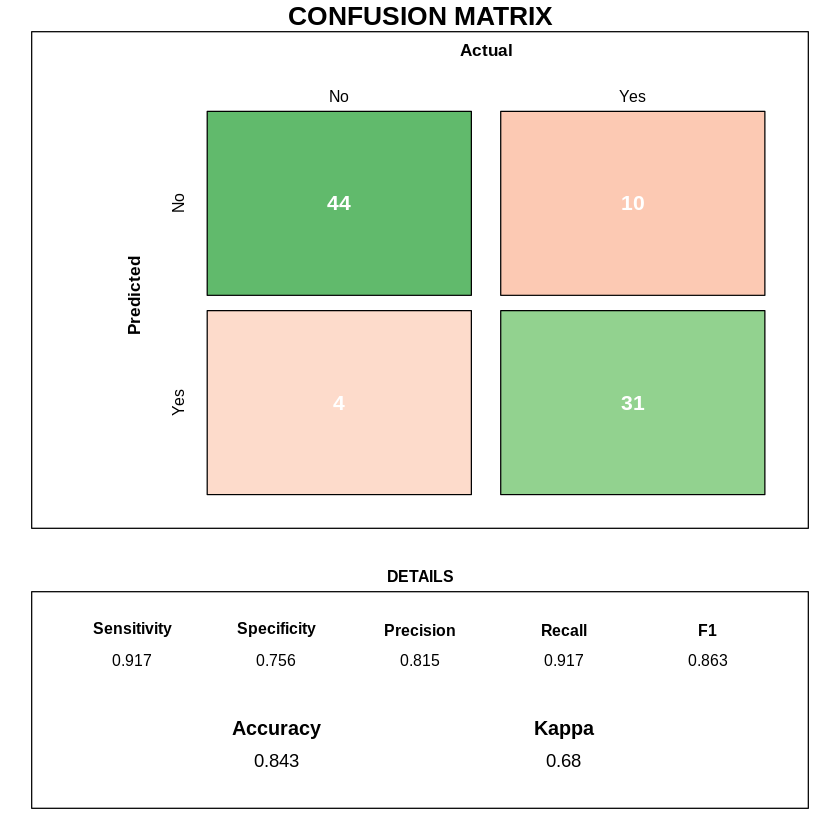

In [20]:
# 디폴트로 생성한 모델의 오차행렬

cm <- caret::confusionMatrix(predict_value$predict_value, test$AHD)
draw_confusion_matrix(cm)

* svm_AHD2

In [21]:
# AHD1과는 다른 
# C값과 gamma값을 조정한 모델 -> 앞의 디폴트 모델보다 성능이 좋지 않은것을 볼 수 있다. 

predict_value <- predict(svm_AHD2, test) %>% 
 tibble(predict_value = .)
predict_check <- test %>% select(AHD) %>% dplyr::bind_cols(., predict_value) 
predict_check %>% show()

# A tibble: 89 x 2
   AHD   predict_value
   <fct> <fct>        
 1 Yes   Yes          
 2 No    No           
 3 No    No           
 4 No    No           
 5 No    No           
 6 No    No           
 7 No    No           
 8 Yes   Yes          
 9 No    Yes          
10 No    No           
# … with 79 more rows


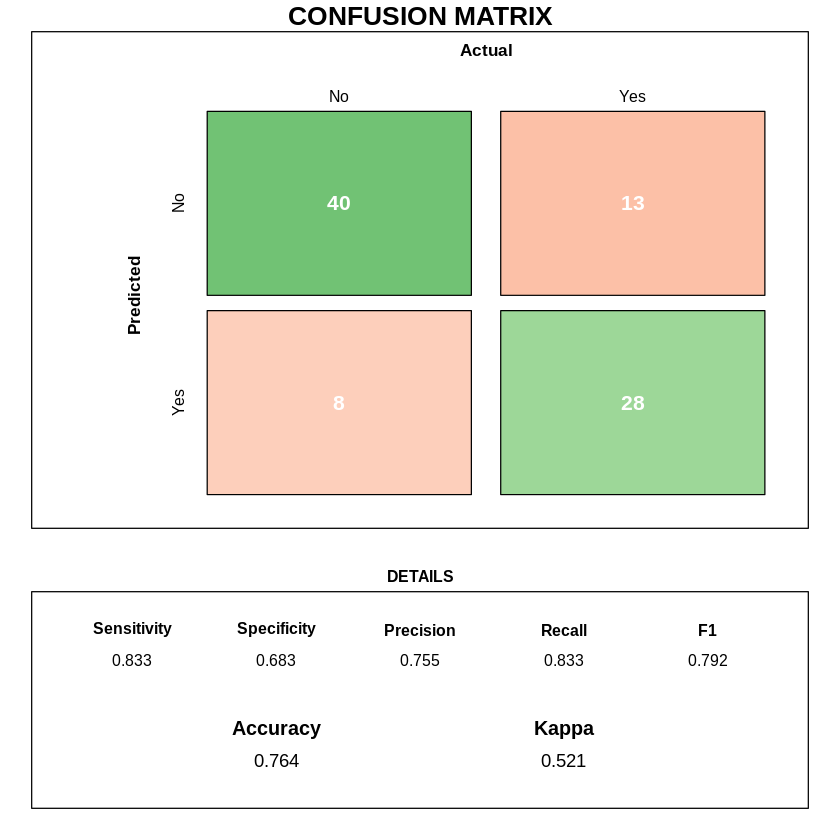

In [22]:
# 

cm <- caret::confusionMatrix(predict_value$predict_value, test$AHD)
draw_confusion_matrix(cm)

* tune()
  * gamma 범위 : 1e-08 ~ 10
  * cost 범위 : 1 ~ 30
  * 총 10 * 30 = 300개의 조합

In [23]:
# tune 함수를 통해 가장좋은 gamma와 cost를 찾을 수 있다.  -> 그리드 서치로 찾아줌 
# 찾고자 하는 범위를 넣어준다.
# 10에 -8승부터 10의 -1승까지를 gamma의 범위로 정한다. 
# 시간이 많이 걸림  -> 범위 늘릴수록 좋은 파라미터 찾을수 있지만 시간이 많이걸림 
set.seed(51)
tuned <- tune.svm(AHD ~ ., data = train, gamma = 10^(-8:1), cost = 1:30)

In [24]:
tune_summary <- summary(tuned)
tune_summary


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 gamma cost
 0.001   16

- best performance: 0.1783333 

- Detailed performance results:
    gamma cost     error dispersion
1   1e-08    1 0.4614286 0.07035167
2   1e-07    1 0.4614286 0.07035167
3   1e-06    1 0.4614286 0.07035167
4   1e-05    1 0.4614286 0.07035167
5   1e-04    1 0.4614286 0.07035167
6   1e-03    1 0.4371429 0.07342192
7   1e-02    1 0.2021429 0.07776522
8   1e-01    1 0.2019048 0.07728871
9   1e+00    1 0.4278571 0.08180419
10  1e+01    1 0.4614286 0.07035167
11  1e-08    2 0.4614286 0.07035167
12  1e-07    2 0.4614286 0.07035167
13  1e-06    2 0.4614286 0.07035167
14  1e-05    2 0.4614286 0.07035167
15  1e-04    2 0.4614286 0.07035167
16  1e-03    2 0.2252381 0.08265560
17  1e-02    2 0.1830952 0.06420679
18  1e-01    2 0.2261905 0.06487579
19  1e+00    2 0.4088095 0.11363378
20  1e+01    2 0.4614286 0.07035167
21  1e-08    3 0.4614286 0.07035167
22  1e-07    3 0.4614286 

In [25]:
# 가징좋은 파라미터를 저장해준다. 

best_parameter <- tune_summary$best.parameters
best_parameter # best_parameter[1,1] == gamma / best_parameter[1,2] == cost

,gamma,cost
,<dbl>,<int>
156,0.001,16


In [26]:
# 가장 좋은 파라미터로 모델을 학습시켜준다. 

svm_AHD_tune <- svm(AHD ~ ., data = train, type = "C-classification", kernel = "radial",
 gamma = best_parameter[1,1], cost = best_parameter[1,2])

In [27]:
summary(svm_AHD_tune)


Call:
svm(formula = AHD ~ ., data = train, type = "C-classification", kernel = "radial", 
    gamma = best_parameter[1, 1], cost = best_parameter[1, 2])


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  16 

Number of Support Vectors:  128

 ( 64 64 )


Number of Classes:  2 

Levels: 
 No Yes




In [28]:
predict_value <- predict(svm_AHD_tune, test) %>% 
 tibble(predict_value = .)
predict_check <- test %>% select(AHD) %>% dplyr::bind_cols(., predict_value) 
predict_check %>% show()

# A tibble: 89 x 2
   AHD   predict_value
   <fct> <fct>        
 1 Yes   Yes          
 2 No    No           
 3 No    No           
 4 No    No           
 5 No    Yes          
 6 No    No           
 7 No    No           
 8 Yes   Yes          
 9 No    No           
10 No    No           
# … with 79 more rows


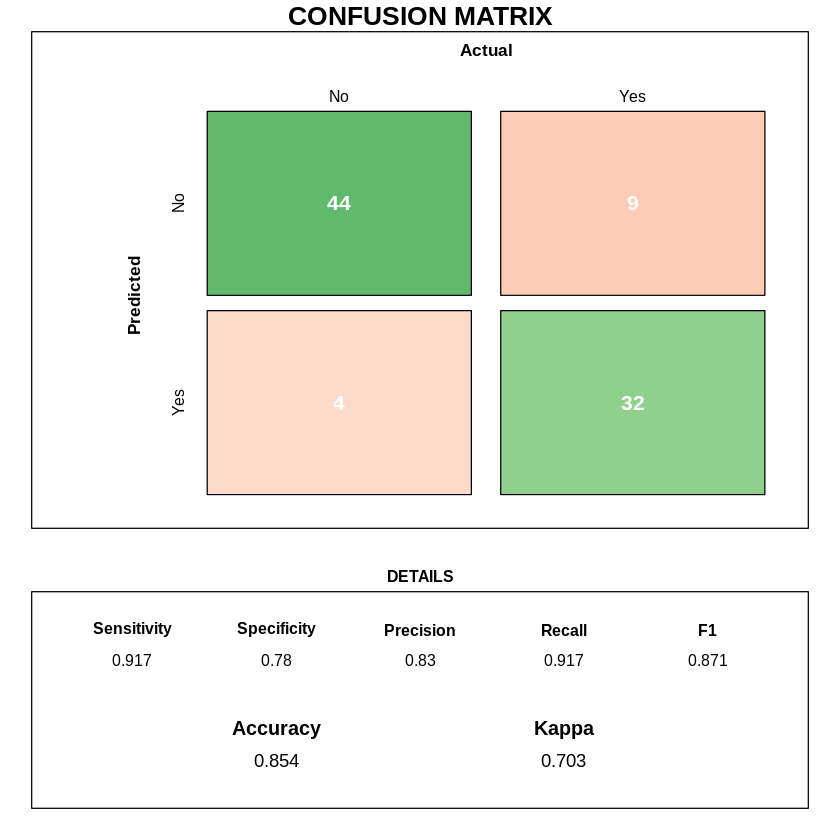

In [29]:
# 디폴트보다 성능이 조금 향상된것을 볼 수 있다.
# 성능 더 높이려면 tune의 범위를 늘려주면 된다. 

cm <- caret::confusionMatrix(predict_value$predict_value, test$AHD)
draw_confusion_matrix(cm)

- - -

#### **B. titanic**

* https://www.kaggle.com/c/titanic/data

**<kaggle의 타이타닉 data>**

  * survived : 생존=1, 죽음=0
  * pclass : 승객 등급. 1등급=1, 2등급=2, 3등급=3
  * sibsp : 함께 탑승한 형제 또는 배우자 수
  * parch : 함께 탑승한 부모 또는 자녀 수
  * ticket : 티켓 번호
  * cabin : 선실 번호
  * embarked : 탑승장소 S=Southhampton, C=Cherbourg, Q=Queenstown

In [30]:
train <- read_csv("https://raw.githubusercontent.com/Jin0331/TA/master/data/titanic/train.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  PassengerId = col_double(),
  Survived = col_double(),
  Pclass = col_double(),
  Name = col_character(),
  Sex = col_character(),
  Age = col_double(),
  SibSp = col_double(),
  Parch = col_double(),
  Ticket = col_character(),
  Fare = col_double(),
  Cabin = col_character(),
  Embarked = col_character()
)




In [31]:
str(train)

tibble [891 × 12] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ PassengerId: num [1:891] 1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : num [1:891] 0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : num [1:891] 3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr [1:891] "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr [1:891] "male" "female" "female" "female" ...
 $ Age        : num [1:891] 22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : num [1:891] 1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : num [1:891] 0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr [1:891] "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num [1:891] 7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr [1:891] NA "C85" NA "C123" ...
 $ Embarked   : chr [1:891] "S" "C" "S" "S" ...
 - attr(*, "spec")=
  .. cols(
  ..   PassengerId = col_double(),
  ..   Survived = col_double(),
  ..   Pclass = col_double(),
  

In [32]:
train %>% summary()

  PassengerId       Survived          Pclass          Name          
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000   Length:891        
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median :446.0   Median :0.0000   Median :3.000   Mode  :character  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309                     
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :891.0   Max.   :1.0000   Max.   :3.000                     
                                                                    
     Sex                 Age            SibSp           Parch       
 Length:891         Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 Class :character   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000  
 Mode  :character   Median :28.00   Median :0.000   Median :0.0000  
                    Mean   :29.70   Mean   :0.523   Mean   :0.3816  
                    3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                    Max.   :80.00 

* 범주형 변수 확인

In [33]:
train <- train %>% 
 select(-PassengerId, -Name, -Cabin, -Ticket) %>% mutate_at(c("Survived","Sex","Embarked", "Pclass"), factor)
summary(train)

 Survived Pclass      Sex           Age            SibSp           Parch       
 0:549    1:216   female:314   Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 1:342    2:184   male  :577   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000  
          3:491                Median :28.00   Median :0.000   Median :0.0000  
                               Mean   :29.70   Mean   :0.523   Mean   :0.3816  
                               3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                               Max.   :80.00   Max.   :8.000   Max.   :6.0000  
                               NA's   :177                                     
      Fare        Embarked  
 Min.   :  0.00   C   :168  
 1st Qu.:  7.91   Q   : 77  
 Median : 14.45   S   :644  
 Mean   : 32.20   NA's:  2  
 3rd Qu.: 31.00             
 Max.   :512.33             
                            

* Hmisc::impute을 이용한 NA 값 대체(평균, 중앙값, 특정 숫자)

* https://m.blog.naver.com/PostView.nhn?blogId=tjdudwo93&logNo=221142961499&proxyReferer=https:%2F%2Fwww.google.com%2F

In [34]:
install.packages("Hmisc")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘png’, ‘jpeg’, ‘checkmate’, ‘Formula’, ‘latticeExtra’, ‘gridExtra’, ‘htmlTable’, ‘viridis’




In [35]:
# NA의 값을 중앙값으로 채워주는 방법

library(Hmisc)
train$Age <- impute(train$Age, median)

Loading required package: survival


Attaching package: ‘survival’


The following object is masked from ‘package:caret’:

    cluster


Loading required package: Formula


Attaching package: ‘Hmisc’


The following object is masked from ‘package:e1071’:

    impute


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units




In [36]:
train %>% summary()


 177 values imputed to 28 



 Survived Pclass      Sex           Age            SibSp           Parch       
 0:549    1:216   female:314   Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 1:342    2:184   male  :577   1st Qu.:22.00   1st Qu.:0.000   1st Qu.:0.0000  
          3:491                Median :28.00   Median :0.000   Median :0.0000  
                               Mean   :29.36   Mean   :0.523   Mean   :0.3816  
                               3rd Qu.:35.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                               Max.   :80.00   Max.   :8.000   Max.   :6.0000  
      Fare        Embarked  
 Min.   :  0.00   C   :168  
 1st Qu.:  7.91   Q   : 77  
 Median : 14.45   S   :644  
 Mean   : 32.20   NA's:  2  
 3rd Qu.: 31.00             
 Max.   :512.33             

In [37]:
# NA의 값을 지워주는 방법

train <- train %>% na.omit()

In [38]:
train %>% summary()


 177 values imputed to 28 



 Survived Pclass      Sex           Age            SibSp       
 0:549    1:214   female:312   Min.   : 0.42   Min.   :0.0000  
 1:340    2:184   male  :577   1st Qu.:22.00   1st Qu.:0.0000  
          3:491                Median :28.00   Median :0.0000  
                               Mean   :29.32   Mean   :0.5242  
                               3rd Qu.:35.00   3rd Qu.:1.0000  
                               Max.   :80.00   Max.   :8.0000  
     Parch             Fare         Embarked
 Min.   :0.0000   Min.   :  0.000   C:168   
 1st Qu.:0.0000   1st Qu.:  7.896   Q: 77   
 Median :0.0000   Median : 14.454   S:644   
 Mean   :0.3825   Mean   : 32.097           
 3rd Qu.:0.0000   3rd Qu.: 31.000           
 Max.   :6.0000   Max.   :512.329           

* **train을 이용한 SVM 모델 생성**

In [39]:
# 시간 오래걸림 

tuned <- tune.svm(Survived ~ ., data = train, gamma = 10^(-8:1), cost = 1:30)
tune_summary <- summary(tuned)
tune_summary


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 gamma cost
   0.1   18

- best performance: 0.1698544 

- Detailed performance results:
    gamma cost     error dispersion
1   1e-08    1 0.3823927 0.05254166
2   1e-07    1 0.3823927 0.05254166
3   1e-06    1 0.3823927 0.05254166
4   1e-05    1 0.3823927 0.05254166
5   1e-04    1 0.3823927 0.05254166
6   1e-03    1 0.3745276 0.04091898
7   1e-02    1 0.2104188 0.04154736
8   1e-01    1 0.1766471 0.03212404
9   1e+00    1 0.1945735 0.03618490
10  1e+01    1 0.2799923 0.05944108
11  1e-08    2 0.3823927 0.05254166
12  1e-07    2 0.3823927 0.05254166
13  1e-06    2 0.3823927 0.05254166
14  1e-05    2 0.3823927 0.05254166
15  1e-04    2 0.3823927 0.05254166
16  1e-03    2 0.3149515 0.03076434
17  1e-02    2 0.2025536 0.04091487
18  1e-01    2 0.1721527 0.03172258
19  1e+00    2 0.2035368 0.05181724
20  1e+01    2 0.2788560 0.06020880
21  1e-08    3 0.3823927 0.05254166
22  1e-07    3 0.3823927 

In [40]:
# Linear은 파라미터로 gamma를 사용하지 않는다. 

tuned_l <- tune.svm(Survived ~ ., data = train, cost = 8^(-10:1), kernel = "linear")
tune_summary_l <- summary(tuned_l)
tune_summary_l


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
     cost
 0.015625

- best performance: 0.2125255 

- Detailed performance results:
           cost     error dispersion
1  9.313226e-10 0.3824949 0.05688469
2  7.450581e-09 0.3824949 0.05688469
3  5.960464e-08 0.3824949 0.05688469
4  4.768372e-07 0.3824949 0.05688469
5  3.814697e-06 0.3824949 0.05688469
6  3.051758e-05 0.3824949 0.05688469
7  2.441406e-04 0.3824949 0.05688469
8  1.953125e-03 0.3712206 0.04691481
9  1.562500e-02 0.2125255 0.06815826
10 1.250000e-01 0.2136747 0.06515805
11 1.000000e+00 0.2136747 0.06515805
12 8.000000e+00 0.2125511 0.06504321


In [41]:
best_parameter <- tune_summary$best.parameters
best_parameter # best_parameter[1,1] == gamma / best_parameter[1,2] == cost

,gamma,cost
,<dbl>,<int>
178,0.1,18


In [42]:
best_parameter_l <- tune_summary_l$best.parameters
best_parameter_l # best_parameter[1,1] == cost

,cost
,<dbl>
9,0.015625


In [43]:
svm_tune <- svm(Survived ~ ., data = train, type = "C-classification", kernel = "radial",
 gamma = best_parameter[1,1], cost = best_parameter[1,2])

In [44]:
svm_linear <- svm(Survived ~ ., data = train, type = "C-classification", kernel = "linear",
 cost = best_parameter[1,1])

* 생성한 2개의 SVM 모델을 이용하여 kaggle에 제출 및 평가받기

In [45]:
# 캐글을 이용해 모델을 제출 및 평가한다. 

test <- read_csv("https://raw.githubusercontent.com/Jin0331/TA/master/data/titanic/test.csv")
test %>% summary()


── Column specification ────────────────────────────────────────────────────────
cols(
  PassengerId = col_double(),
  Pclass = col_double(),
  Name = col_character(),
  Sex = col_character(),
  Age = col_double(),
  SibSp = col_double(),
  Parch = col_double(),
  Ticket = col_character(),
  Fare = col_double(),
  Cabin = col_character(),
  Embarked = col_character()
)




  PassengerId         Pclass          Name               Sex           
 Min.   : 892.0   Min.   :1.000   Length:418         Length:418        
 1st Qu.: 996.2   1st Qu.:1.000   Class :character   Class :character  
 Median :1100.5   Median :3.000   Mode  :character   Mode  :character  
 Mean   :1100.5   Mean   :2.266                                        
 3rd Qu.:1204.8   3rd Qu.:3.000                                        
 Max.   :1309.0   Max.   :3.000                                        
                                                                       
      Age            SibSp            Parch           Ticket         
 Min.   : 0.17   Min.   :0.0000   Min.   :0.0000   Length:418        
 1st Qu.:21.00   1st Qu.:0.0000   1st Qu.:0.0000   Class :character  
 Median :27.00   Median :0.0000   Median :0.0000   Mode  :character  
 Mean   :30.27   Mean   :0.4474   Mean   :0.3923                     
 3rd Qu.:39.00   3rd Qu.:1.0000   3rd Qu.:0.0000                     
 Max

* NA 값 추정(median)

In [46]:
# NA값을 중앙값으로 대체해준다. 
library(Hmisc)
test$Age <- impute(test$Age, median)
test$Fare <- impute(test$Age, median)
test %>% summary()


 86 values imputed to 27 


 86 values imputed to 27 



  PassengerId         Pclass          Name               Sex           
 Min.   : 892.0   Min.   :1.000   Length:418         Length:418        
 1st Qu.: 996.2   1st Qu.:1.000   Class :character   Class :character  
 Median :1100.5   Median :3.000   Mode  :character   Mode  :character  
 Mean   :1100.5   Mean   :2.266                                        
 3rd Qu.:1204.8   3rd Qu.:3.000                                        
 Max.   :1309.0   Max.   :3.000                                        
      Age            SibSp            Parch           Ticket         
 Min.   : 0.17   Min.   :0.0000   Min.   :0.0000   Length:418        
 1st Qu.:23.00   1st Qu.:0.0000   1st Qu.:0.0000   Class :character  
 Median :27.00   Median :0.0000   Median :0.0000   Mode  :character  
 Mean   :29.60   Mean   :0.4474   Mean   :0.3923                     
 3rd Qu.:35.75   3rd Qu.:1.0000   3rd Qu.:0.0000                     
 Max.   :76.00   Max.   :8.0000   Max.   :9.0000                     
      

* 범주형 변수

In [47]:
test <- test %>% 
 select(-Name, -Cabin, -Ticket) %>% mutate_at(c("Sex","Embarked", "Pclass"), factor)
summary(test)


 86 values imputed to 27 


 86 values imputed to 27 



  PassengerId     Pclass      Sex           Age            SibSp       
 Min.   : 892.0   1:107   female:152   Min.   : 0.17   Min.   :0.0000  
 1st Qu.: 996.2   2: 93   male  :266   1st Qu.:23.00   1st Qu.:0.0000  
 Median :1100.5   3:218                Median :27.00   Median :0.0000  
 Mean   :1100.5                        Mean   :29.60   Mean   :0.4474  
 3rd Qu.:1204.8                        3rd Qu.:35.75   3rd Qu.:1.0000  
 Max.   :1309.0                        Max.   :76.00   Max.   :8.0000  
     Parch             Fare       Embarked
 Min.   :0.0000   Min.   : 0.17   C:102   
 1st Qu.:0.0000   1st Qu.:23.00   Q: 46   
 Median :0.0000   Median :27.00   S:270   
 Mean   :0.3923   Mean   :29.60           
 3rd Qu.:0.0000   3rd Qu.:35.75           
 Max.   :9.0000   Max.   :76.00           

* 예측(model_grid 모델, model_linear)

In [48]:
# model
predict_value <- predict(svm_tune, test) %>% tibble(Survived = .)
submission1 <- test %>% select(PassengerId) %>% dplyr::bind_cols(., predict_value) %>% 
 write_csv(path = "submission1.csv")

 # model
predict_value <- predict(svm_linear, test) %>% tibble(Survived = .)
submission1 <- test %>% select(PassengerId) %>% dplyr::bind_cols(., predict_value) %>%
  write_csv(path = "submission2.csv")

Warning message:
“The `path` argument of `write_csv()` is deprecated as of readr 1.4.0.
Please use the `file` argument instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


* https://rpubs.com/mohammedkb/Titanic

### Confusion Matrix plot code

In [19]:
#https://stackoverflow.com/questions/23891140/r-how-to-visualize-confusion-matrix-using-the-caret-package

draw_confusion_matrix <- function(cm) {

  total <- sum(cm$table)
  res <- as.numeric(cm$table)

  # Generate color gradients. Palettes come from RColorBrewer.
  greenPalette <- c("#F7FCF5","#E5F5E0","#C7E9C0","#A1D99B","#74C476","#41AB5D","#238B45","#006D2C","#00441B")
  redPalette <- c("#FFF5F0","#FEE0D2","#FCBBA1","#FC9272","#FB6A4A","#EF3B2C","#CB181D","#A50F15","#67000D")
  getColor <- function (greenOrRed = "green", amount = 0) {
    if (amount == 0)
      return("#FFFFFF")
    palette <- greenPalette
    if (greenOrRed == "red")
      palette <- redPalette
    colorRampPalette(palette)(100)[10 + ceiling(90 * amount / total)]
  }

  # set the basic layout
  layout(matrix(c(1,1,2)))
  par(mar=c(2,2,2,2))
  plot(c(100, 345), c(300, 450), type = "n", xlab="", ylab="", xaxt='n', yaxt='n')
  title('CONFUSION MATRIX', cex.main=2)

  # create the matrix 
  classes = colnames(cm$table)
  rect(150, 430, 240, 370, col=getColor("green", res[1]))
  text(195, 435, classes[1], cex=1.2)
  rect(250, 430, 340, 370, col=getColor("red", res[3]))
  text(295, 435, classes[2], cex=1.2)
  text(125, 370, 'Predicted', cex=1.3, srt=90, font=2)
  text(245, 450, 'Actual', cex=1.3, font=2)
  rect(150, 305, 240, 365, col=getColor("red", res[2]))
  rect(250, 305, 340, 365, col=getColor("green", res[4]))
  text(140, 400, classes[1], cex=1.2, srt=90)
  text(140, 335, classes[2], cex=1.2, srt=90)

  # add in the cm results
  text(195, 400, res[1], cex=1.6, font=2, col='white')
  text(195, 335, res[2], cex=1.6, font=2, col='white')
  text(295, 400, res[3], cex=1.6, font=2, col='white')
  text(295, 335, res[4], cex=1.6, font=2, col='white')

  # add in the specifics 
  plot(c(100, 0), c(100, 0), type = "n", xlab="", ylab="", main = "DETAILS", xaxt='n', yaxt='n')
  text(10, 85, names(cm$byClass[1]), cex=1.2, font=2)
  text(10, 70, round(as.numeric(cm$byClass[1]), 3), cex=1.2)
  text(30, 85, names(cm$byClass[2]), cex=1.2, font=2)
  text(30, 70, round(as.numeric(cm$byClass[2]), 3), cex=1.2)
  text(50, 85, names(cm$byClass[5]), cex=1.2, font=2)
  text(50, 70, round(as.numeric(cm$byClass[5]), 3), cex=1.2)
  text(70, 85, names(cm$byClass[6]), cex=1.2, font=2)
  text(70, 70, round(as.numeric(cm$byClass[6]), 3), cex=1.2)
  text(90, 85, names(cm$byClass[7]), cex=1.2, font=2)
  text(90, 70, round(as.numeric(cm$byClass[7]), 3), cex=1.2)

  # add in the accuracy information 
  text(30, 35, names(cm$overall[1]), cex=1.5, font=2)
  text(30, 20, round(as.numeric(cm$overall[1]), 3), cex=1.4)
  text(70, 35, names(cm$overall[2]), cex=1.5, font=2)
  text(70, 20, round(as.numeric(cm$overall[2]), 3), cex=1.4)
}